In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_excel('/content/CHN_AQI.xlsx')

In [ ]:
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
2004,Chennai,2020-06-27,26.42,39.30,7.25,12.96,19.59,33.20,1.10,7.29,68.51,0.10,0.07,NaN,95.0,Satisfactory
2005,Chennai,2020-06-28,25.93,45.54,7.81,10.00,16.39,35.98,0.76,6.48,77.45,0.09,0.00,NaN,98.0,Satisfactory
2006,Chennai,2020-06-29,21.30,22.21,7.65,9.69,16.74,34.07,0.96,6.62,62.57,0.09,0.01,NaN,104.0,Moderate
2007,Chennai,2020-06-30,24.14,30.66,8.42,12.38,20.29,34.17,1.05,7.50,68.75,0.17,0.16,NaN,110.0,Moderate
2008,Chennai,2020-07-01,15.95,4.85,6.22,10.72,16.44,33.52,1.02,9.23,48.37,0.09,0.00,NaN,92.0,Satisfactory


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        2009 non-null   object        
 1   Date        2009 non-null   datetime64[ns]
 2   PM2.5       1892 non-null   float64       
 3   PM10        302 non-null    float64       
 4   NO          1973 non-null   float64       
 5   NO2         1973 non-null   float64       
 6   NOx         1973 non-null   float64       
 7   NH3         1547 non-null   float64       
 8   CO          1984 non-null   float64       
 9   SO2         1973 non-null   float64       
 10  O3          1960 non-null   float64       
 11  Benzene     1724 non-null   float64       
 12  Toluene     1756 non-null   float64       
 13  Xylene      0 non-null      float64       
 14  AQI         1884 non-null   float64       
 15  AQI_Bucket  1884 non-null   object        
dtypes: datetime64[ns](1), fl

In [ ]:
df.isnull().sum()

City             0
Date             0
PM2.5          117
PM10          1707
NO              36
NO2             36
NOx             36
NH3            462
CO              25
SO2             36
O3              49
Benzene        285
Toluene        253
Xylene        2009
AQI            125
AQI_Bucket     125
dtype: int64

In [ ]:
## df = df.drop(df.columns[[0, 4, 6]], axis=1)
df = df.drop(columns=['City'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2009 non-null   datetime64[ns]
 1   PM2.5       1892 non-null   float64       
 2   PM10        302 non-null    float64       
 3   NO          1973 non-null   float64       
 4   NO2         1973 non-null   float64       
 5   NOx         1973 non-null   float64       
 6   NH3         1547 non-null   float64       
 7   CO          1984 non-null   float64       
 8   SO2         1973 non-null   float64       
 9   O3          1960 non-null   float64       
 10  Benzene     1724 non-null   float64       
 11  Toluene     1756 non-null   float64       
 12  Xylene      0 non-null      float64       
 13  AQI         1884 non-null   float64       
 14  AQI_Bucket  1884 non-null   object        
dtypes: datetime64[ns](1), float64(13), object(1)
memory usage: 235.6+ KB


In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer

# Load your dataset (assuming it's already loaded into a DataFrame named 'df')

# Drop the 'Xylene' column as it has no non-null values
df.drop(columns=['Xylene','PM10'], inplace=True)

# Define columns for statistical imputation and KNN imputation
statistical_impute_cols = ['PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3']
knn_impute_cols = ['NH3', 'Benzene', 'Toluene']

# Impute missing values using statistical measures (mean, median, or mode)
statistical_imputer = SimpleImputer(strategy='mean')  # You can change the strategy if needed
df[statistical_impute_cols] = statistical_imputer.fit_transform(df[statistical_impute_cols])

# Impute missing values using K-nearest neighbors (KNN) imputation
knn_imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors as needed
df[knn_impute_cols] = knn_imputer.fit_transform(df[knn_impute_cols])

# Drop rows with missing AQI values
df.dropna(subset=['AQI', 'AQI_Bucket'], inplace=True)

# Now your dataset should have missing values imputed and rows with missing AQI values dropped

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1884 entries, 82 to 2008
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1884 non-null   datetime64[ns]
 1   PM2.5       1884 non-null   float64       
 2   NO          1884 non-null   float64       
 3   NO2         1884 non-null   float64       
 4   NOx         1884 non-null   float64       
 5   NH3         1884 non-null   float64       
 6   CO          1884 non-null   float64       
 7   SO2         1884 non-null   float64       
 8   O3          1884 non-null   float64       
 9   Benzene     1884 non-null   float64       
 10  Toluene     1884 non-null   float64       
 11  AQI         1884 non-null   float64       
 12  AQI_Bucket  1884 non-null   object        
dtypes: datetime64[ns](1), float64(11), object(1)
memory usage: 206.1+ KB


In [ ]:
df.head()

,Date,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
82,2015-03-24,149.04,31.23,112.29,12.77,9.68,0.93,14.04,38.67,4.492,8.390,333.0,Very Poor
84,2015-03-26,140.21,16.83,31.79,25.73,10.91,1.41,11.94,44.52,6.978,8.020,318.0,Very Poor
85,2015-03-27,266.29,39.96,50.12,20.48,11.51,1.27,25.45,27.64,5.536,8.350,408.0,Severe
86,2015-03-28,88.65,22.83,38.75,20.64,10.97,2.21,11.76,27.68,7.342,7.862,448.0,Severe
89,2015-03-31,51.69,37.45,46.48,16.09,11.41,1.23,6.53,27.62,4.558,6.940,312.0,Very Poor


In [ ]:
df.tail()

,Date,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
2004,2020-06-27,26.42,7.25,12.96,19.59,33.20,1.10,7.29,68.51,0.10,0.07,95.0,Satisfactory
2005,2020-06-28,25.93,7.81,10.00,16.39,35.98,0.76,6.48,77.45,0.09,0.00,98.0,Satisfactory
2006,2020-06-29,21.30,7.65,9.69,16.74,34.07,0.96,6.62,62.57,0.09,0.01,104.0,Moderate
2007,2020-06-30,24.14,8.42,12.38,20.29,34.17,1.05,7.50,68.75,0.17,0.16,110.0,Moderate
2008,2020-07-01,15.95,6.22,10.72,16.44,33.52,1.02,9.23,48.37,0.09,0.00,92.0,Satisfactory


In [ ]:
# Maximum value in the AQI column
max_aqi = df['AQI'].max()
print("Maximum AQI value:", max_aqi)

# Unique values in the AQI_Bucket column
unique_aqi_buckets = df['AQI_Bucket'].unique()
print("Unique AQI buckets:", unique_aqi_buckets)


Maximum AQI value: 449.0
Unique AQI buckets: ['Very Poor' 'Severe' 'Poor' 'Moderate' 'Satisfactory' 'Good']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1884 entries, 82 to 2008
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1884 non-null   datetime64[ns]
 1   PM2.5       1884 non-null   float64       
 2   NO          1884 non-null   float64       
 3   NO2         1884 non-null   float64       
 4   NOx         1884 non-null   float64       
 5   NH3         1884 non-null   float64       
 6   CO          1884 non-null   float64       
 7   SO2         1884 non-null   float64       
 8   O3          1884 non-null   float64       
 9   Benzene     1884 non-null   float64       
 10  Toluene     1884 non-null   float64       
 11  AQI         1884 non-null   float64       
 12  AQI_Bucket  1884 non-null   object        
dtypes: datetime64[ns](1), float64(11), object(1)
memory usage: 206.1+ KB


In [ ]:
df = df.set_index('Date')
df.head()

,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
Date,,,,,,,,,,,,
2015-03-24,149.04,31.23,112.29,12.77,9.68,0.93,14.04,38.67,4.492,8.390,333.0,Very Poor
2015-03-26,140.21,16.83,31.79,25.73,10.91,1.41,11.94,44.52,6.978,8.020,318.0,Very Poor
2015-03-27,266.29,39.96,50.12,20.48,11.51,1.27,25.45,27.64,5.536,8.350,408.0,Severe
2015-03-28,88.65,22.83,38.75,20.64,10.97,2.21,11.76,27.68,7.342,7.862,448.0,Severe
2015-03-31,51.69,37.45,46.48,16.09,11.41,1.23,6.53,27.62,4.558,6.940,312.0,Very Poor


In [ ]:
# Define mapping dictionary for AQI buckets
aqi_bucket_mapping = {
    'Good': 0,
    'Satisfactory': 1,
    'Moderate': 2,
    'Poor': 3,
    'Very Poor': 4,
    'Severe': 5
}

# Map AQI buckets to numerical values
df['Encoded_AQI_Bucket'] = df['AQI_Bucket'].map(aqi_bucket_mapping)
df.head()

,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Encoded_AQI_Bucket
Date,,,,,,,,,,,,,
2015-03-24,149.04,31.23,112.29,12.77,9.68,0.93,14.04,38.67,4.492,8.390,333.0,Very Poor,4
2015-03-26,140.21,16.83,31.79,25.73,10.91,1.41,11.94,44.52,6.978,8.020,318.0,Very Poor,4
2015-03-27,266.29,39.96,50.12,20.48,11.51,1.27,25.45,27.64,5.536,8.350,408.0,Severe,5
2015-03-28,88.65,22.83,38.75,20.64,10.97,2.21,11.76,27.68,7.342,7.862,448.0,Severe,5
2015-03-31,51.69,37.45,46.48,16.09,11.41,1.23,6.53,27.62,4.558,6.940,312.0,Very Poor,4


In [ ]:
df = df.drop(columns=['AQI_Bucket', 'Encoded_AQI_Bucket'])

In [ ]:
df.tail()

,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
Date,,,,,,,,,,,
2020-06-27,26.42,7.25,12.96,19.59,33.20,1.10,7.29,68.51,0.10,0.07,95.0
2020-06-28,25.93,7.81,10.00,16.39,35.98,0.76,6.48,77.45,0.09,0.00,98.0
2020-06-29,21.30,7.65,9.69,16.74,34.07,0.96,6.62,62.57,0.09,0.01,104.0
2020-06-30,24.14,8.42,12.38,20.29,34.17,1.05,7.50,68.75,0.17,0.16,110.0
2020-07-01,15.95,6.22,10.72,16.44,33.52,1.02,9.23,48.37,0.09,0.00,92.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1884 entries, 2015-03-24 to 2020-07-01
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PM2.5    1884 non-null   float64
 1   NO       1884 non-null   float64
 2   NO2      1884 non-null   float64
 3   NOx      1884 non-null   float64
 4   NH3      1884 non-null   float64
 5   CO       1884 non-null   float64
 6   SO2      1884 non-null   float64
 7   O3       1884 non-null   float64
 8   Benzene  1884 non-null   float64
 9   Toluene  1884 non-null   float64
 10  AQI      1884 non-null   float64
dtypes: float64(11)
memory usage: 176.6 KB


In [ ]:
# Assuming your dataset is named df
X = df.drop(columns=['AQI'])  # Independent variables (features)
y = df['AQI']  # Dependent variable (target)

# Check the shapes of X and y
print("Shape of X:", X)
print("Shape of y:", y)


Shape of X:              PM2.5     NO     NO2    NOx    NH3    CO    SO2     O3  Benzene  \
Date                                                                           
2015-03-24  149.04  31.23  112.29  12.77   9.68  0.93  14.04  38.67    4.492   
2015-03-26  140.21  16.83   31.79  25.73  10.91  1.41  11.94  44.52    6.978   
2015-03-27  266.29  39.96   50.12  20.48  11.51  1.27  25.45  27.64    5.536   
2015-03-28   88.65  22.83   38.75  20.64  10.97  2.21  11.76  27.68    7.342   
2015-03-31   51.69  37.45   46.48  16.09  11.41  1.23   6.53  27.62    4.558   
...            ...    ...     ...    ...    ...   ...    ...    ...      ...   
2020-06-27   26.42   7.25   12.96  19.59  33.20  1.10   7.29  68.51    0.100   
2020-06-28   25.93   7.81   10.00  16.39  35.98  0.76   6.48  77.45    0.090   
2020-06-29   21.30   7.65    9.69  16.74  34.07  0.96   6.62  62.57    0.090   
2020-06-30   24.14   8.42   12.38  20.29  34.17  1.05   7.50  68.75    0.170   
2020-07-01   15.95   6.22   

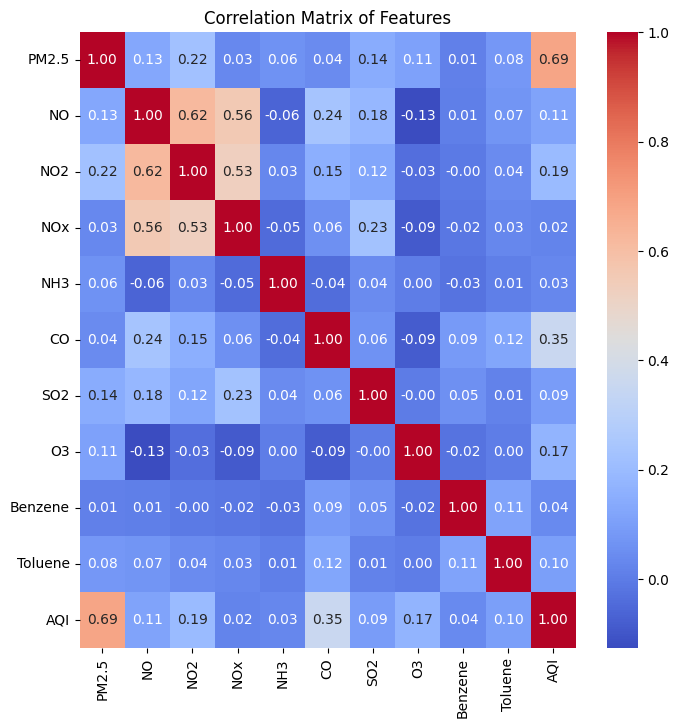

In [ ]:
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix of Features')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training (70%) and temporary (30%)
X_train_temp, X_temp, y_train_temp, y_temp = train_test_split(X, y, test_size=0.3, shuffle=False)

# Further split the temporary dataset (30%) into test (50%) and validation (50%)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# Check the shapes of the datasets
print("Training set shape:", X_train_temp.shape, y_train_temp.shape)
print("Test set shape:", X_test.shape, y_test.shape)
print("Validation set shape:", X_val.shape, y_val.shape)


Training set shape: (1318, 10) (1318,)
Test set shape: (283, 10) (283,)
Validation set shape: (283, 10) (283,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train_temp, y_train_temp)

# Make predictions on the test data
y_pred_test = model.predict(X_test)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error on the test set:", mse_test)

# Calculate Mean Absolute Error (MAE) for test set
mae_test = mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error (MAE) on the test set:", mae_test)

# Calculate Root Mean Squared Error (RMSE) for test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Root Mean Squared Error (RMSE) on the test set:", rmse_test)

# Calculate R-squared for test set
r2_test = r2_score(y_test, y_pred_test)
print("R-squared on the test set:", r2_test)

# Make predictions on the validation data
y_pred_val = model.predict(X_val)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_val, y_pred_val)
print("Mean Squared Error on the validation set:", mse_val)

# Calculate Mean Absolute Error (MAE) for validation set
mae_val = mean_absolute_error(y_val, y_pred_val)
print("Mean Absolute Error (MAE) on the validation set:", mae_val)

# Calculate Root Mean Squared Error (RMSE) for validation set
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
print("Root Mean Squared Error (RMSE) on the validation set:", rmse_val)

# Calculate R-squared for validation set
r2_val = r2_score(y_val, y_pred_val)
print("R-squared on the validation set:", r2_val)


Mean Squared Error on the test set: 474.52203724790934
Mean Absolute Error (MAE) on the test set: 16.98899517863407
Root Mean Squared Error (RMSE) on the test set: 21.783526740358397
R-squared on the test set: 0.6591375792150691
Mean Squared Error on the validation set: 511.8879591877467
Mean Absolute Error (MAE) on the validation set: 18.07148627033756
Root Mean Squared Error (RMSE) on the validation set: 22.624941086945324
R-squared on the validation set: 0.6585325407838262


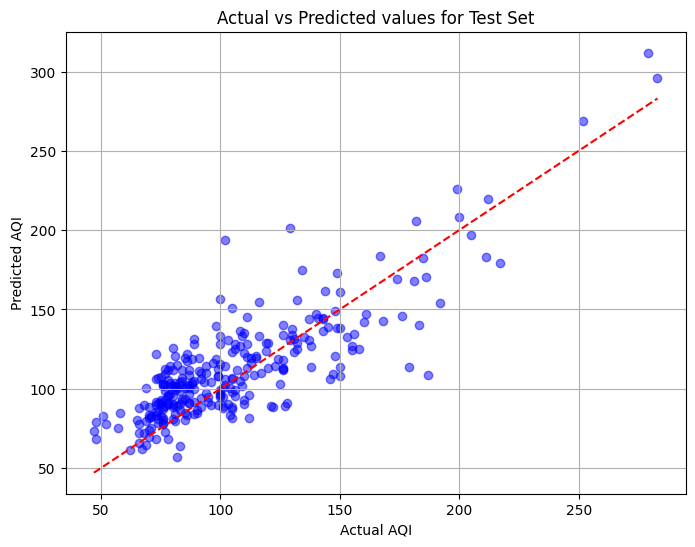

In [ ]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values for the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted values for Test Set')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.grid(True)
plt.show()

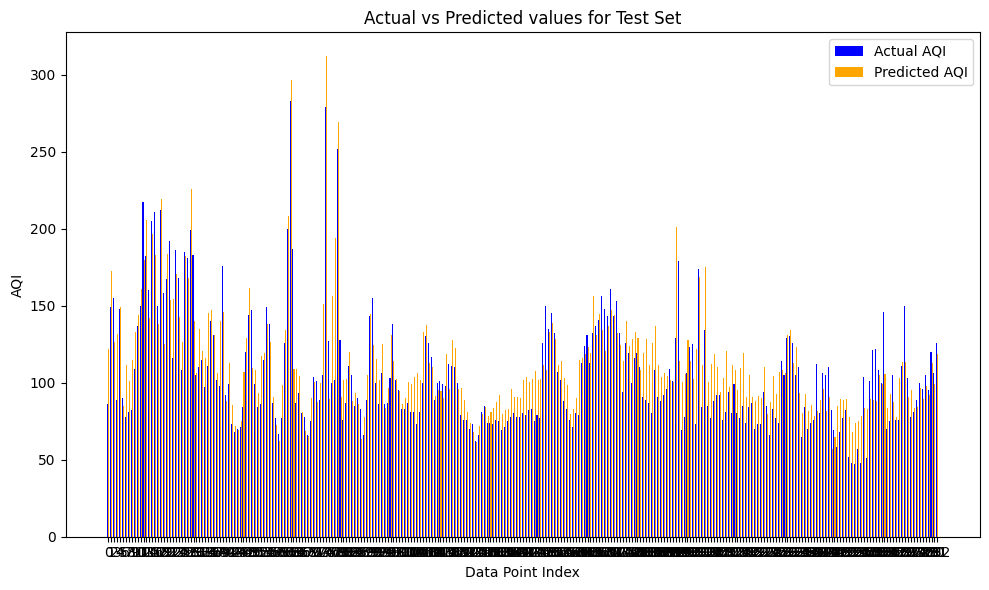

In [ ]:
import numpy as np

# Generate indices for each data point
indices = np.arange(len(y_test))

# Plotting the actual and predicted values as a bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35

plt.bar(indices, y_test, bar_width, label='Actual AQI', color='blue')
plt.bar(indices + bar_width, y_pred_test, bar_width, label='Predicted AQI', color='orange')

plt.xlabel('Data Point Index')
plt.ylabel('AQI')
plt.title('Actual vs Predicted values for Test Set')
plt.xticks(indices + bar_width / 2, indices)
plt.legend()
plt.tight_layout()
plt.show()


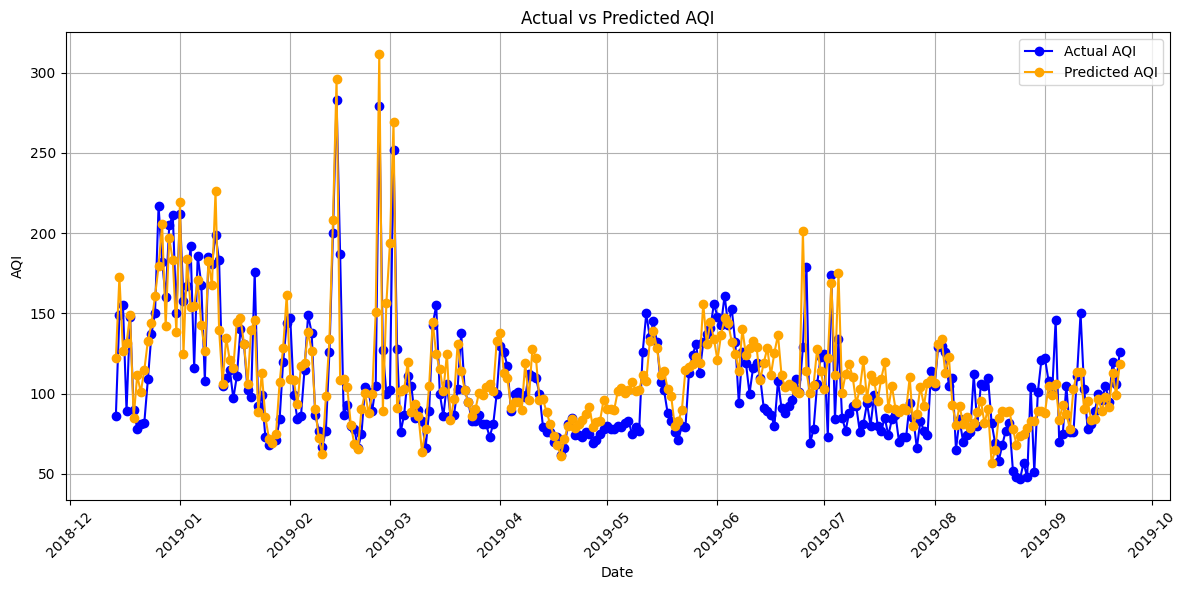

In [ ]:
import matplotlib.pyplot as plt

# Plotting the actual and predicted values along with dates
plt.figure(figsize=(12, 6))
plt.plot(X_test.index, y_test, label='Actual AQI', marker='o', color='blue')
plt.plot(X_test.index, y_pred_test, label='Predicted AQI', marker='o', color='orange')

plt.title('Actual vs Predicted AQI')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


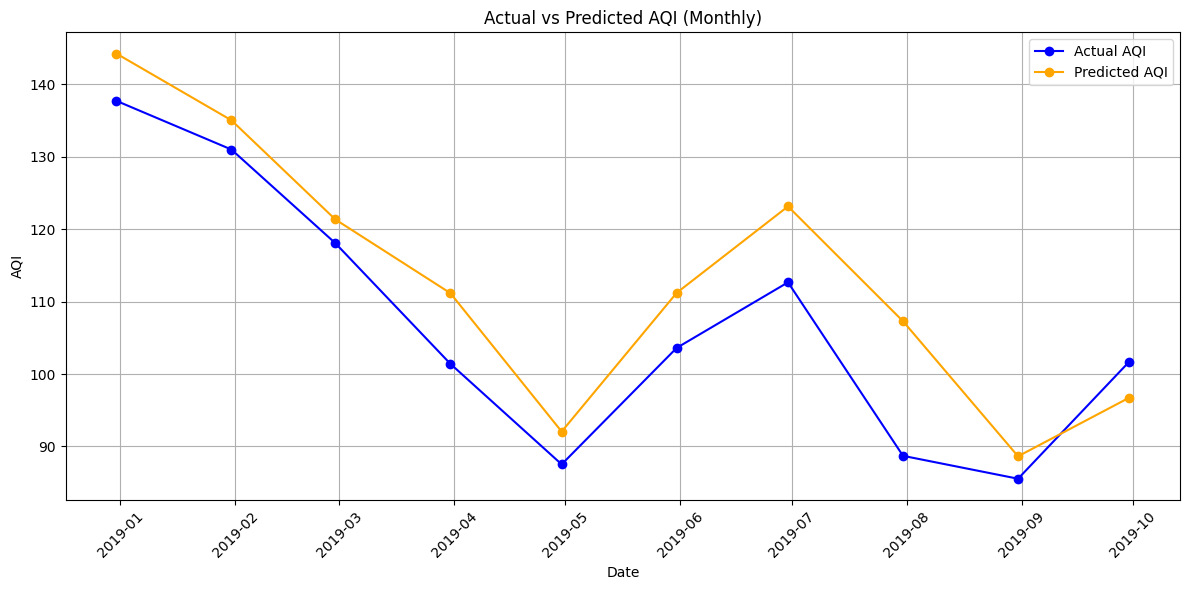

In [ ]:
# Resample data to a lower frequency (e.g., monthly)
X_test_resampled = X_test.resample('M').mean()
y_test_resampled = y_test.resample('M').mean()
y_pred_test_resampled = pd.Series(y_pred_test, index=X_test.index).resample('M').mean()

# Plotting the actual and predicted values along with resampled dates
plt.figure(figsize=(12, 6))
plt.plot(X_test_resampled.index, y_test_resampled, label='Actual AQI', marker='o', color='blue')
plt.plot(X_test_resampled.index, y_pred_test_resampled, label='Predicted AQI', marker='o', color='orange')

plt.title('Actual vs Predicted AQI (Monthly)')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


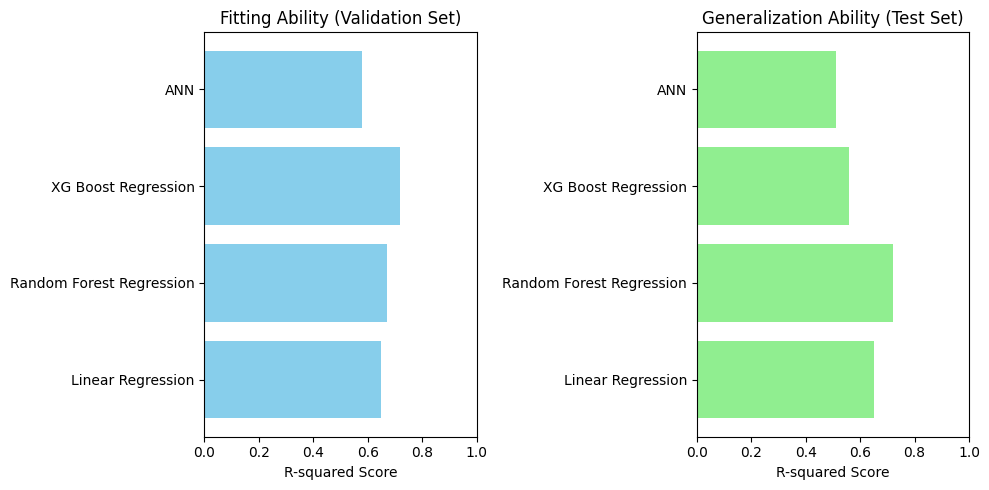

In [ ]:
import matplotlib.pyplot as plt

# Test set scores
test_mse = [474.52, 898, 599.51, 1590.9]
test_r_squared = [0.65, 0.72, 0.56, 0.51]

# Validation set scores
val_mse = [511.88, 682.21, 404.88, 869.67]
val_r_squared = [0.65, 0.67, 0.72, 0.58]

# Model names
models = ['Linear Regression', 'Random Forest Regression', 'XG Boost Regression', 'ANN']

# Plotting fitting ability (Validation set)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.barh(models, val_r_squared, color='skyblue')
plt.xlabel('R-squared Score')
plt.title('Fitting Ability (Validation Set)')
plt.xlim(0, 1)

# Plotting generalization ability (Test set)
plt.subplot(1, 2, 2)
plt.barh(models, test_r_squared, color='lightgreen')
plt.xlabel('R-squared Score')
plt.title('Generalization Ability (Test Set)')
plt.xlim(0, 1)

plt.tight_layout()
plt.show()
